In [37]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [38]:
data = pd.read_csv('./CardioGoodFitness.csv')

In [39]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


## <span style='color:blue'> Data description </span>

Product: Categorical unordered<br/>
Age: Numeric ordinal, continuous<br/>
Gender: Categorical unordered<br/>
Education: Numeric ordinal, discrete<br/>
MaritalStatus: Categorical unordered<br/>
Usage: Numeric ordinal, discrete<br/>
Fitness: Numeric ordinal, discrete<br/>
Income: Numeric ordinal, continuous<br/>

## <span style='color:blue'> Features engineering </span>

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### <span style="color:blue"> Comment: </span>

- We are not passing the data to any model, so we don't need to change the data type from objects to numericals here.

In [41]:
# data describe give us all the statistical information for numerical features
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [42]:
# It checks the values that are NaN, in this case there are none.
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [43]:
# This is just an exercise to visualize the quantities of unique values in each feature;
uniques = {}
for col in data:
    uniques[data[col].name] = data[col].nunique()

unique_values = pd.DataFrame.from_dict(uniques, orient='index')
unique_values.columns = ['Count']
unique_values

,Count
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [10]:
# Playing around to find the total amount of income per gender
data_count = data.groupby(['Product', 'Gender'])['Income'].sum()
data_count_i = data_count.reset_index()

data_count_bar = data_count_i.groupby(['Gender'])['Income'].sum()
data_count_bar

Gender
Female    3786997
Male      5882527
Name: Income, dtype: int64

In [11]:
# Playing around to find the total count of male and female, per gender category
data_count = data.groupby(['Product', 'Gender'])['Income'].count()
data_count_i = data_count.reset_index()
data_count_i.columns = ['Product', 'Gender', 'Count']
data_count_i

data_count_bar_sum = data_count_i.groupby(['Gender'])['Count'].sum()
data_count_bar_sum

Gender
Female     76
Male      104
Name: Count, dtype: int64

In [12]:
# Female average income
data_count_bar['Female']/data_count_bar_sum['Female']

49828.90789473684

In [13]:
# Male average income
data_count_bar['Male']/data_count_bar_sum['Male']

56562.75961538462

## <span style="color:blue"> Understanding customer profile and performing uni-variate and multi-variate analysis </span>

In [14]:
# Filtering the data based on products types, building a dictionary with it
product_TM195 = data[data['Product']=='TM195']
product_TM498 = data[data['Product']=='TM498']
product_TM798 = data[data['Product']=='TM798']

dict_products = {'TM195': product_TM195, 'TM498': product_TM498, 'TM798': product_TM798 }

In [15]:
# Male and Female quantity per product;
for items in dict_products:
    print('--',items)
    print(dict_products[items].groupby(['Gender'])['Gender'].count())
    print('\n')

-- TM195
Gender
Female    40
Male      40
Name: Gender, dtype: int64


-- TM498
Gender
Female    29
Male      31
Name: Gender, dtype: int64


-- TM798
Gender
Female     7
Male      33
Name: Gender, dtype: int64




In [16]:
# different way of showing it
data_count = data.groupby(['Product', 'Gender'])['Income'].count()
data_count_i = data_count.reset_index()
data_count_i.columns = ['Product', 'Gender', 'Count']
data_count_i

,Product,Gender,Count
0,TM195,Female,40
1,TM195,Male,40
2,TM498,Female,29
3,TM498,Male,31
4,TM798,Female,7
5,TM798,Male,33


##### <span style="color:blue"> Comment: </span>

- There is a 50/50 proportion between male and female buyers of the product TM195. There is 29 female and 31 male of the product TM498, and there is 7 female and 33 male of the product TM798.

In [17]:
# Marital Status by Product
for items in dict_products:
    print('--', items)
    print(dict_products[items].groupby(['MaritalStatus'])['MaritalStatus'].count())
    print('\n')

-- TM195
MaritalStatus
Partnered    48
Single       32
Name: MaritalStatus, dtype: int64


-- TM498
MaritalStatus
Partnered    36
Single       24
Name: MaritalStatus, dtype: int64


-- TM798
MaritalStatus
Partnered    23
Single       17
Name: MaritalStatus, dtype: int64




##### <span style="color:blue"> Comment: </span>

- There is a majority of Partnered couples in our customer's product list.

In [18]:
# Income by product and then by gender;
for items in dict_products:
    print(items)
    print(dict_products[items].groupby(['Gender'])['Income'].sum())
    print('\n')

TM195
Gender
Female    1840803
Male      1872639
Name: Income, dtype: int64


TM498
Gender
Female    1430757
Male      1507662
Name: Income, dtype: int64


TM798
Gender
Female     515437
Male      2502226
Name: Income, dtype: int64




##### <span style="color:blue"> Comment: </span>

- In absolute term the consumers who spend more money in our products are men.

In [19]:
# Average income by product and by gender;
for items in dict_products:
    print(items)
    print(dict_products[items].groupby(['Gender'])['Income'].sum()/dict_products[items].groupby(['Gender'])['Gender'].count())
    print('\n')

TM195
Gender
Female    46020.075
Male      46815.975
dtype: float64


TM498
Gender
Female    49336.448276
Male      48634.258065
dtype: float64


TM798
Gender
Female    73633.857143
Male      75825.030303
dtype: float64




##### <span style="color:blue"> Comment: </span>

- We can see that men in this list of consumers have an average higher level of income.

In [20]:
data.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [21]:
data.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [22]:
data.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

In [23]:
data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

##### <span style="color:blue"> Comment: </span>

The Average Age of the customers in our dataset is 28.78, the Education average level 15.57, Usage 3.45, Fitness 3.31, Income 53719.57, and Miles 103.19

The Median Age of the customers in our dataset is 26, the Education average level 16, Usage 3.0, Fitness 3.0, Income 50596.5, and Miles 94.0

The Standard deviation of the Age of the customers in our dataset is 6.94, the Education average level 1.61, Usage 1.08, Fitness 0.95, Income 16506.68, and Miles 51.86

The skewness of our dataset is positive in all our features.

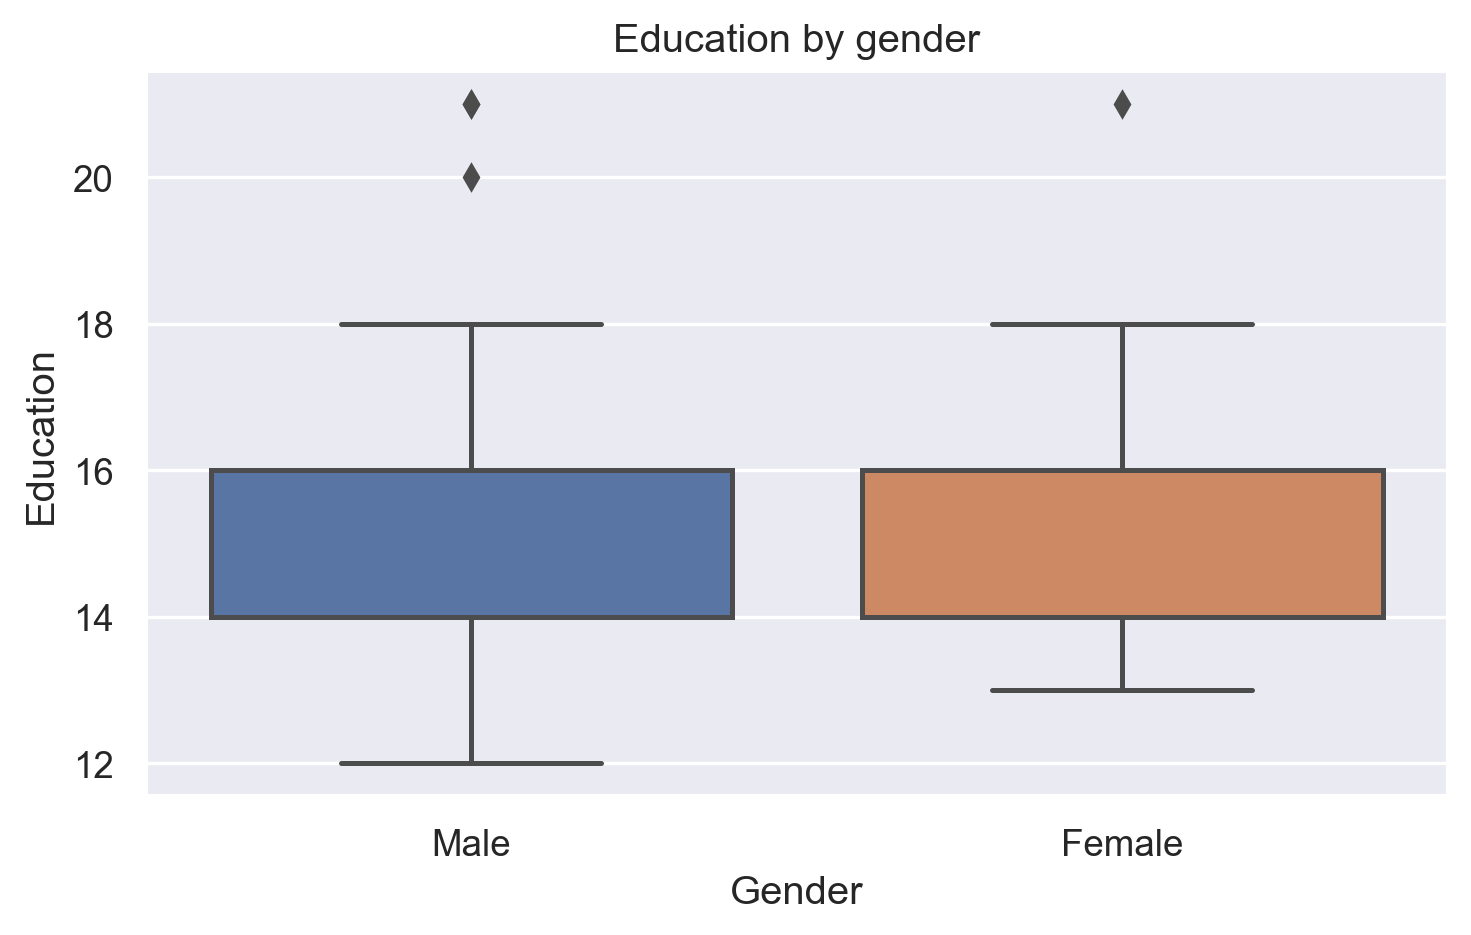

In [24]:
# Education by gender;
sns_plot = sns.boxplot(x='Gender', y='Education', data=data).set(title='Education by gender')
plt.savefig('yourTitle.png')

##### <span style="color:blue"> Comment: </span>

- The level of education that the Male client has a minimum of 12 years a maximum of 18 years with the Q3 being 16 years and Q1 being 14 years. We also see outliers above 18 years.<br/>
- The level of education that Female clients have a minimum of 13 years a maximum of 18 years with the Q3 being 16 years and Q1 being 14 years. We also see outliers above the 18 years.

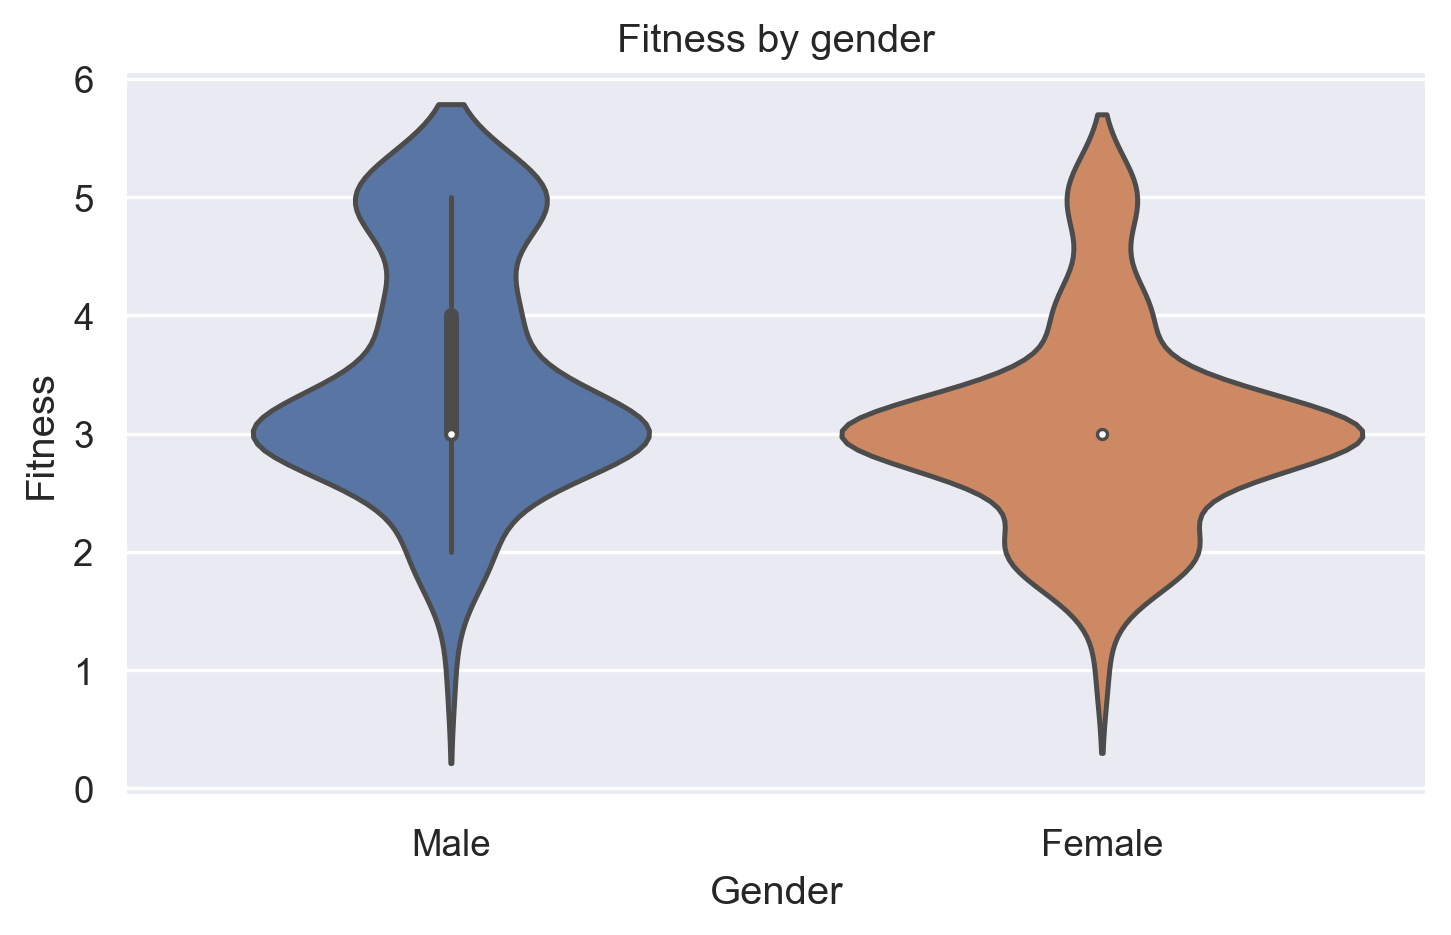

In [25]:
# Fitness by gender;
sns.violinplot(x='Gender', y='Fitness', data=data).set(title='Fitness by gender');

##### <span style="color:blue"> Comment: </span>

Men self-rated themselves a little more in terms of fitness score.

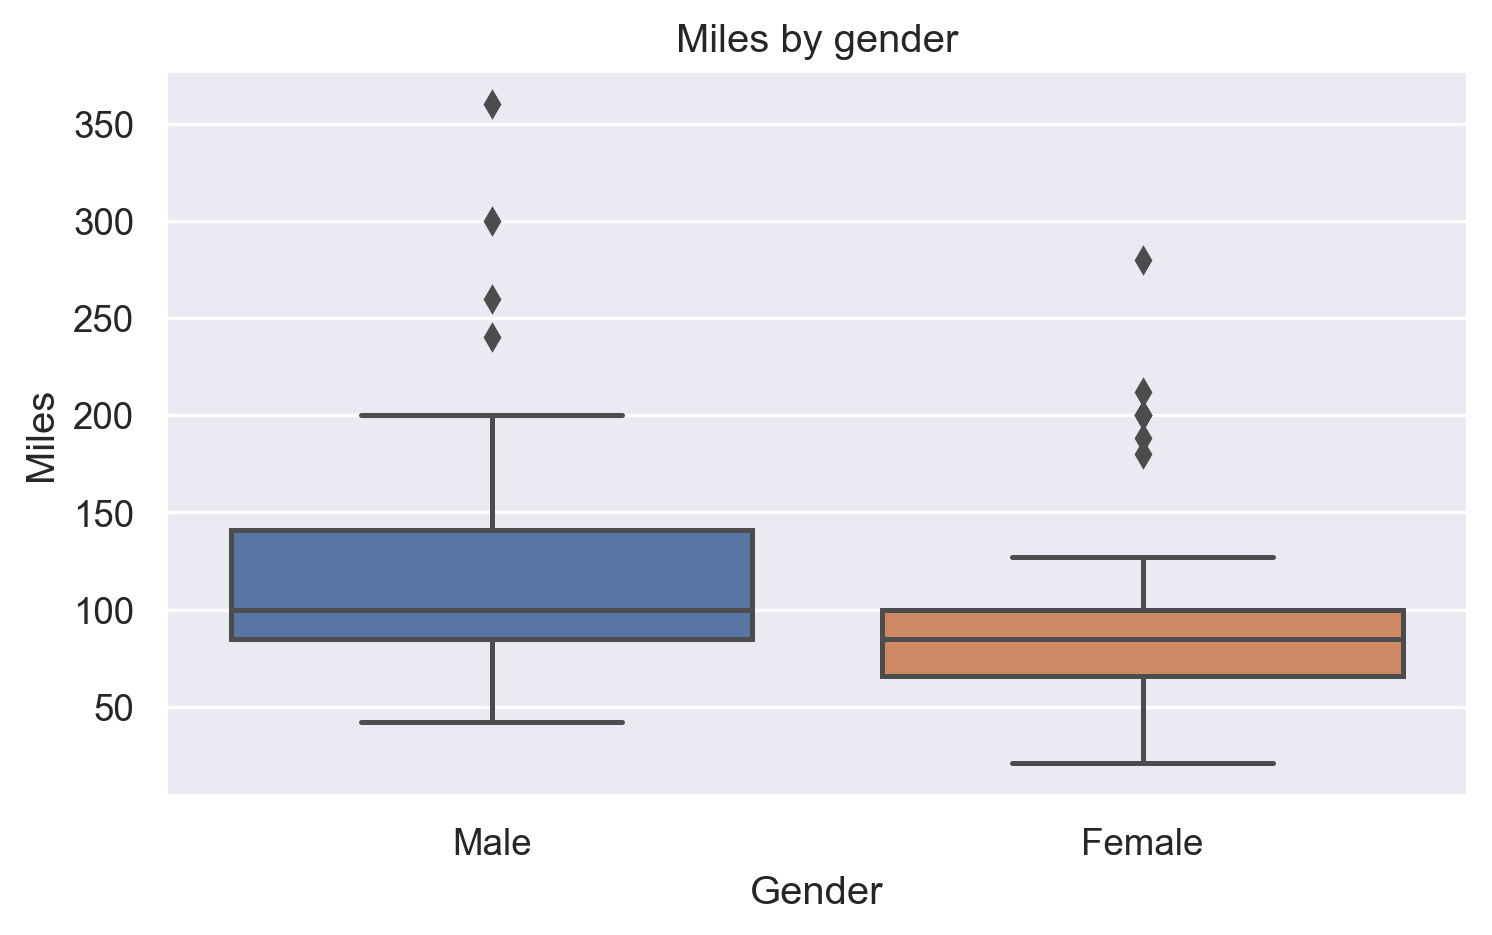

In [26]:
# Miles by gender;
sns.boxplot(x='Gender', y='Miles', data=data).set(title="Miles by gender");

##### <span style="color:blue"> Comment: </span>

Men believe themselves will run more miles, on average, than woman believe themselves running, in our dataset.

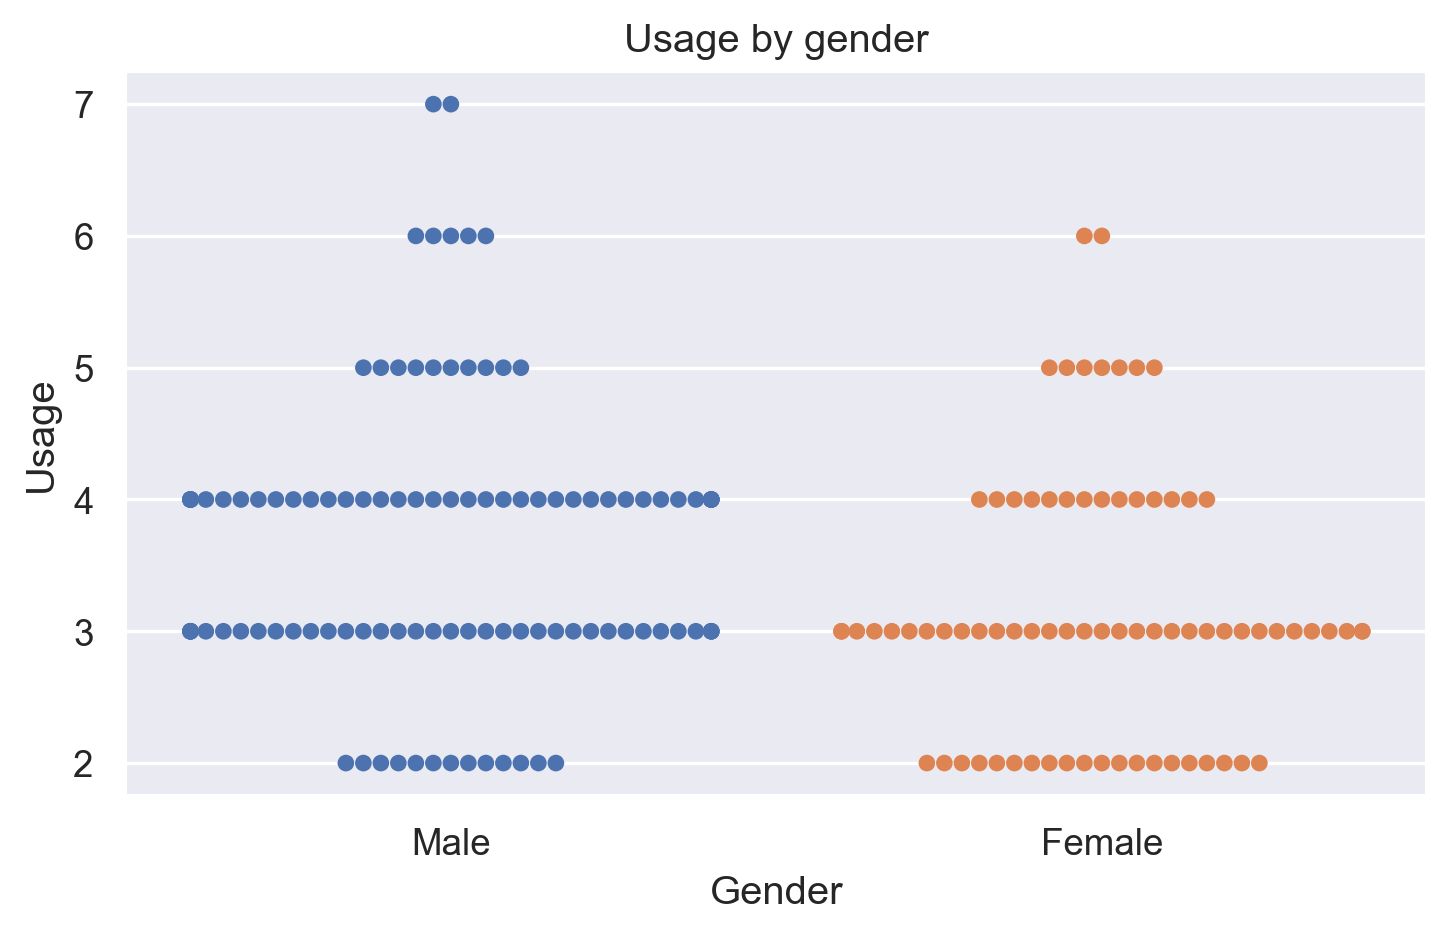

In [27]:
# Usage by gender;
sns.swarmplot(x='Gender', y='Usage', data=data).set(title='Usage by gender');

##### <span style="color:blue"> Comment: </span>

Men believe themselves will use the product more times than woman believe themselves using it, in our dataset.

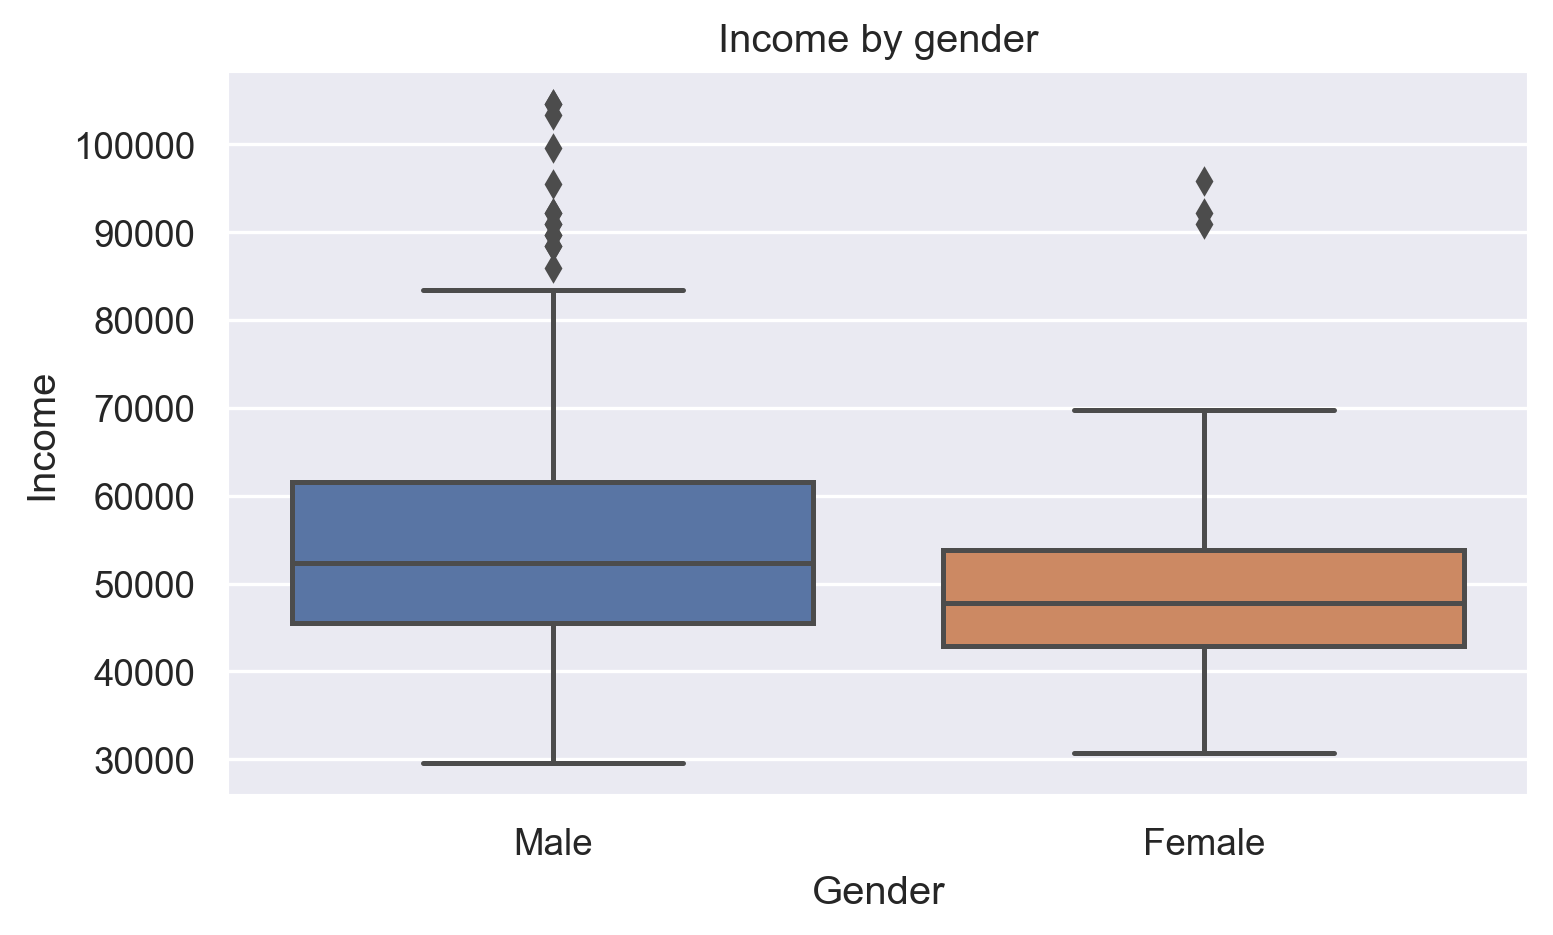

In [28]:
# Income by gender;
sns.boxplot(x='Gender', y='Income', data=data).set(title='Income by gender');

##### <span style="color:blue"> Comment: </span>

Men has a higher income, on average, than women.

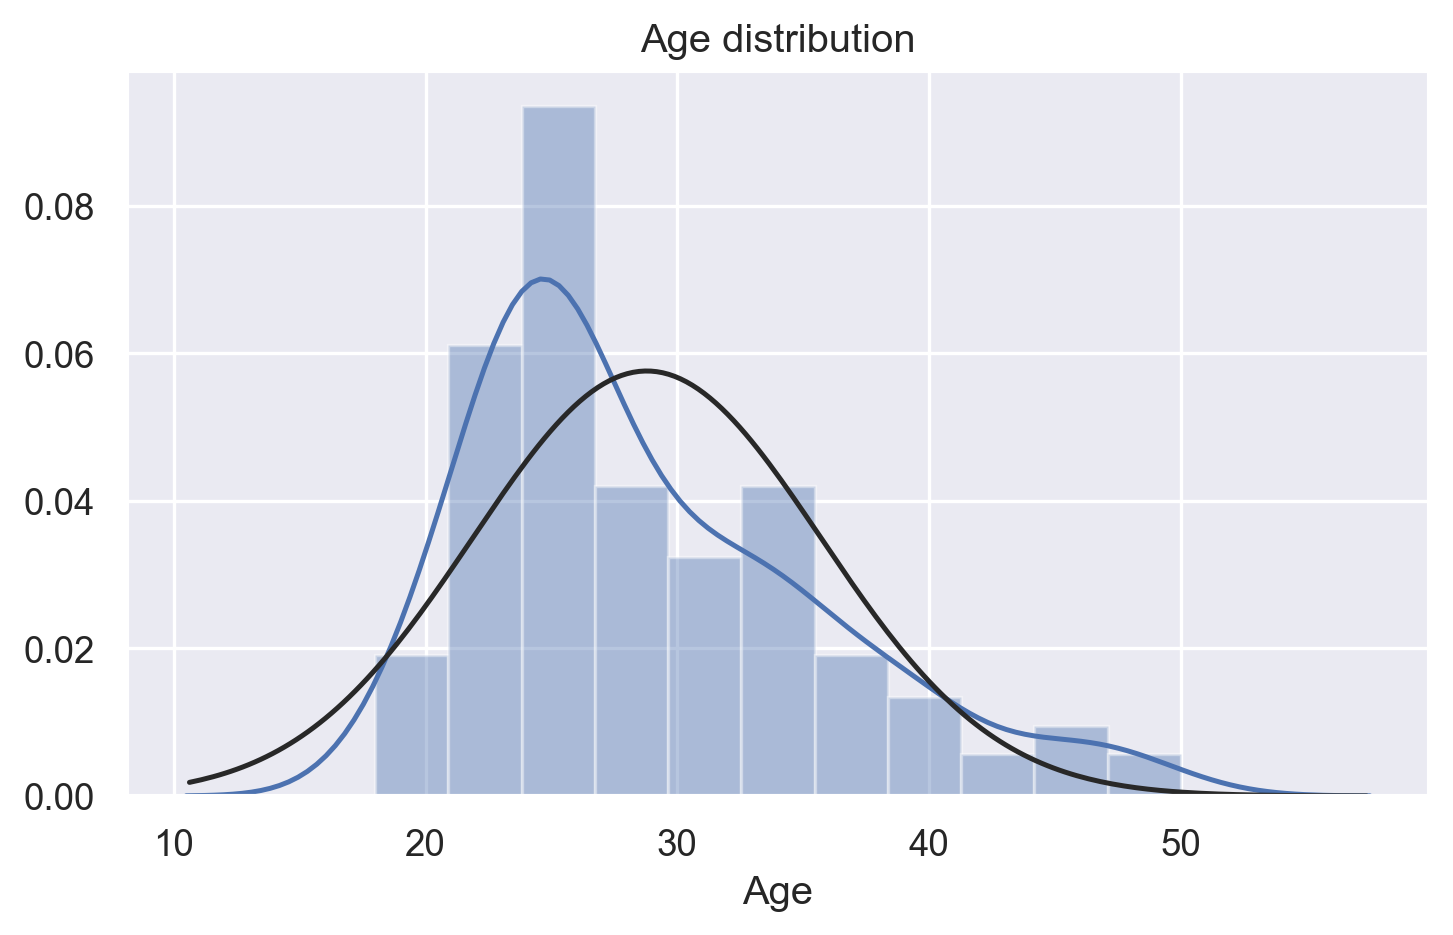

In [29]:
# Age distribution
sns.distplot(data['Age'], fit=norm).set(title='Age distribution');

##### <span style="color:blue"> Comment: </span>

The age of our customers are positively skewed with a higher concentration between 35 years old and 18 years old.

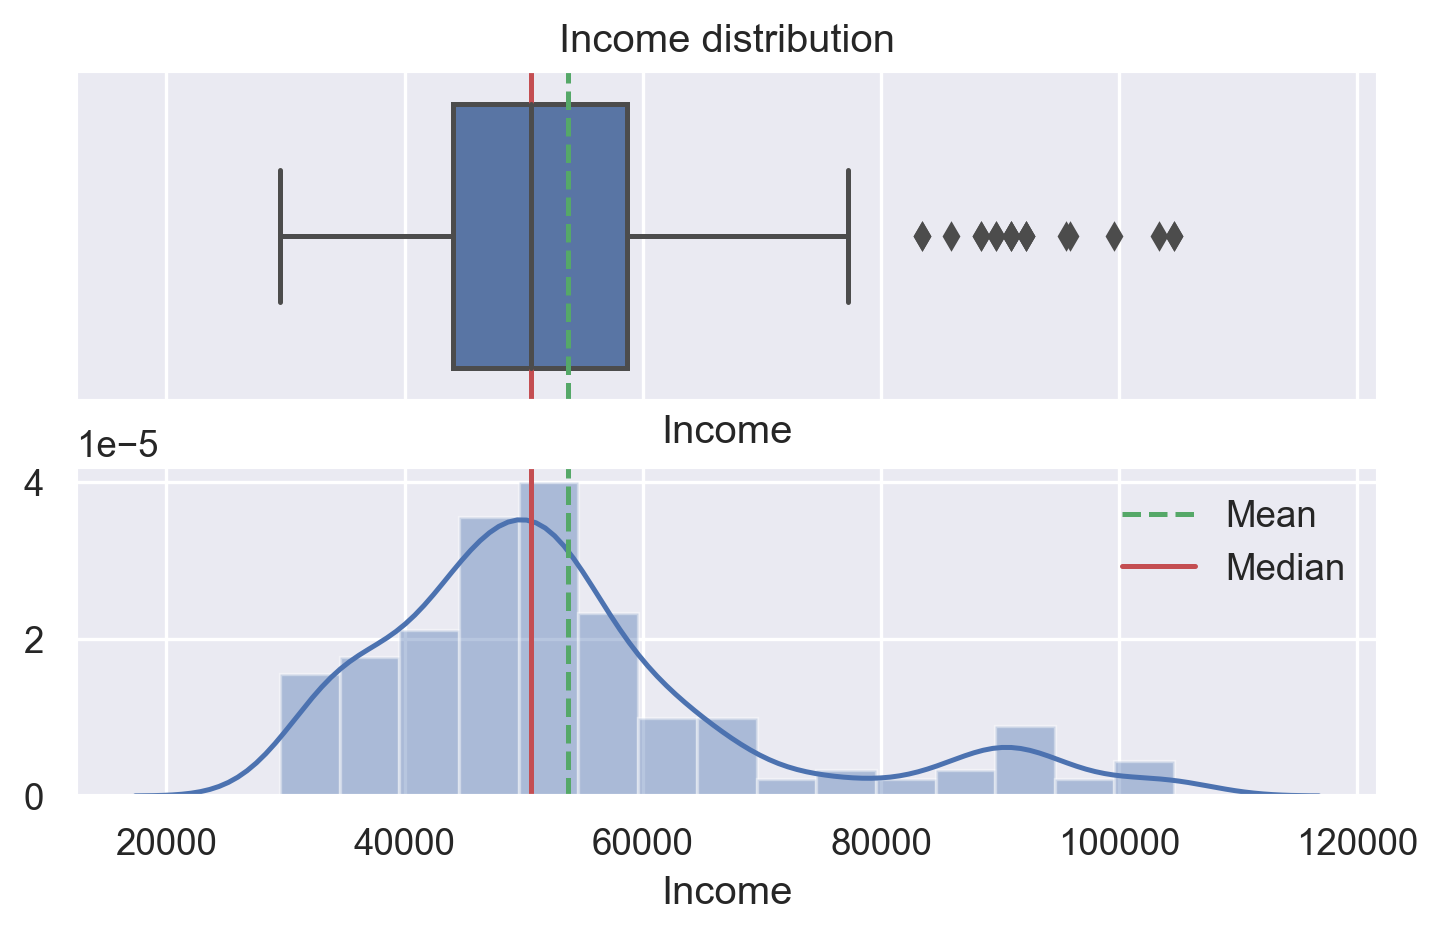

In [30]:
# Income distribution
function, (box, hist) = plt.subplots(2, sharex=True)
mean = data['Income'].mean()
median = data['Income'].median()

sns.boxplot(data['Income'], ax=box).set(title='Income distribution')
box.axvline(mean, color='g', linestyle='--')
box.axvline(median, color='r', linestyle='-')

sns.distplot(data['Income'], ax=hist)
hist.axvline(mean, color='g', linestyle='--')
hist.axvline(median, color='r', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.show()

##### <span style="color:blue"> Comment: </span>

The income of our customers are positively skewed with a higher concentration under $60,000.00.

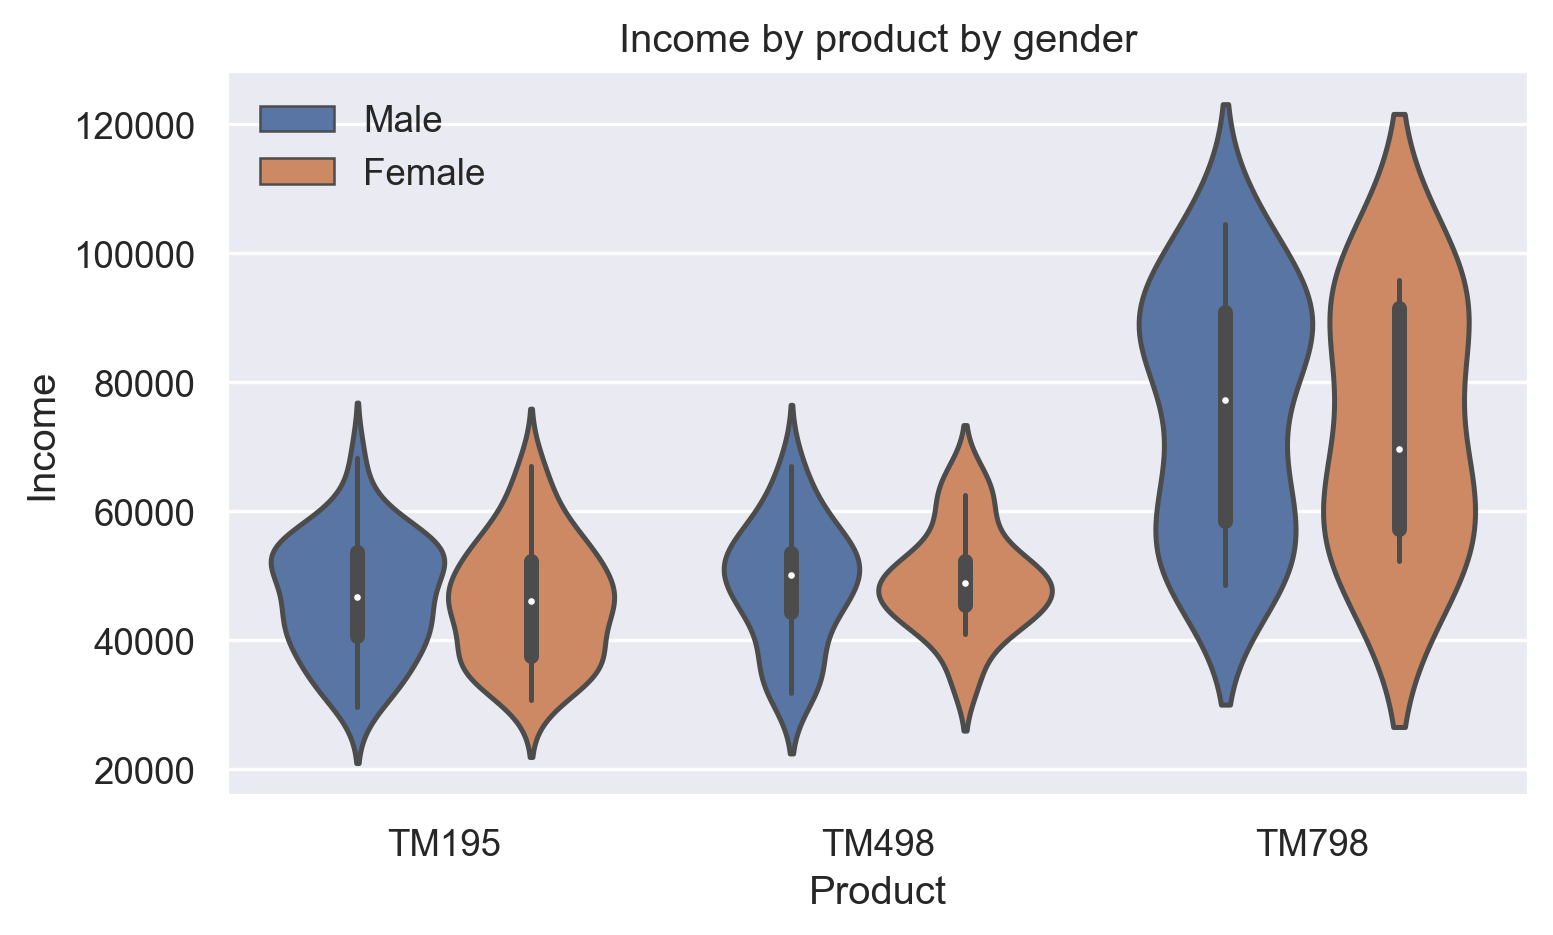

In [31]:
# Income by product by gender
viol_plot = sns.violinplot(x='Product', y='Income', hue='Gender', data=data, legend=False)
viol_plot.legend(loc=2);
viol_plot.set(title='Income by product by gender');

##### <span style="color:blue"> Comment: </span>

Customers that have a higher income level usually buy TM798.

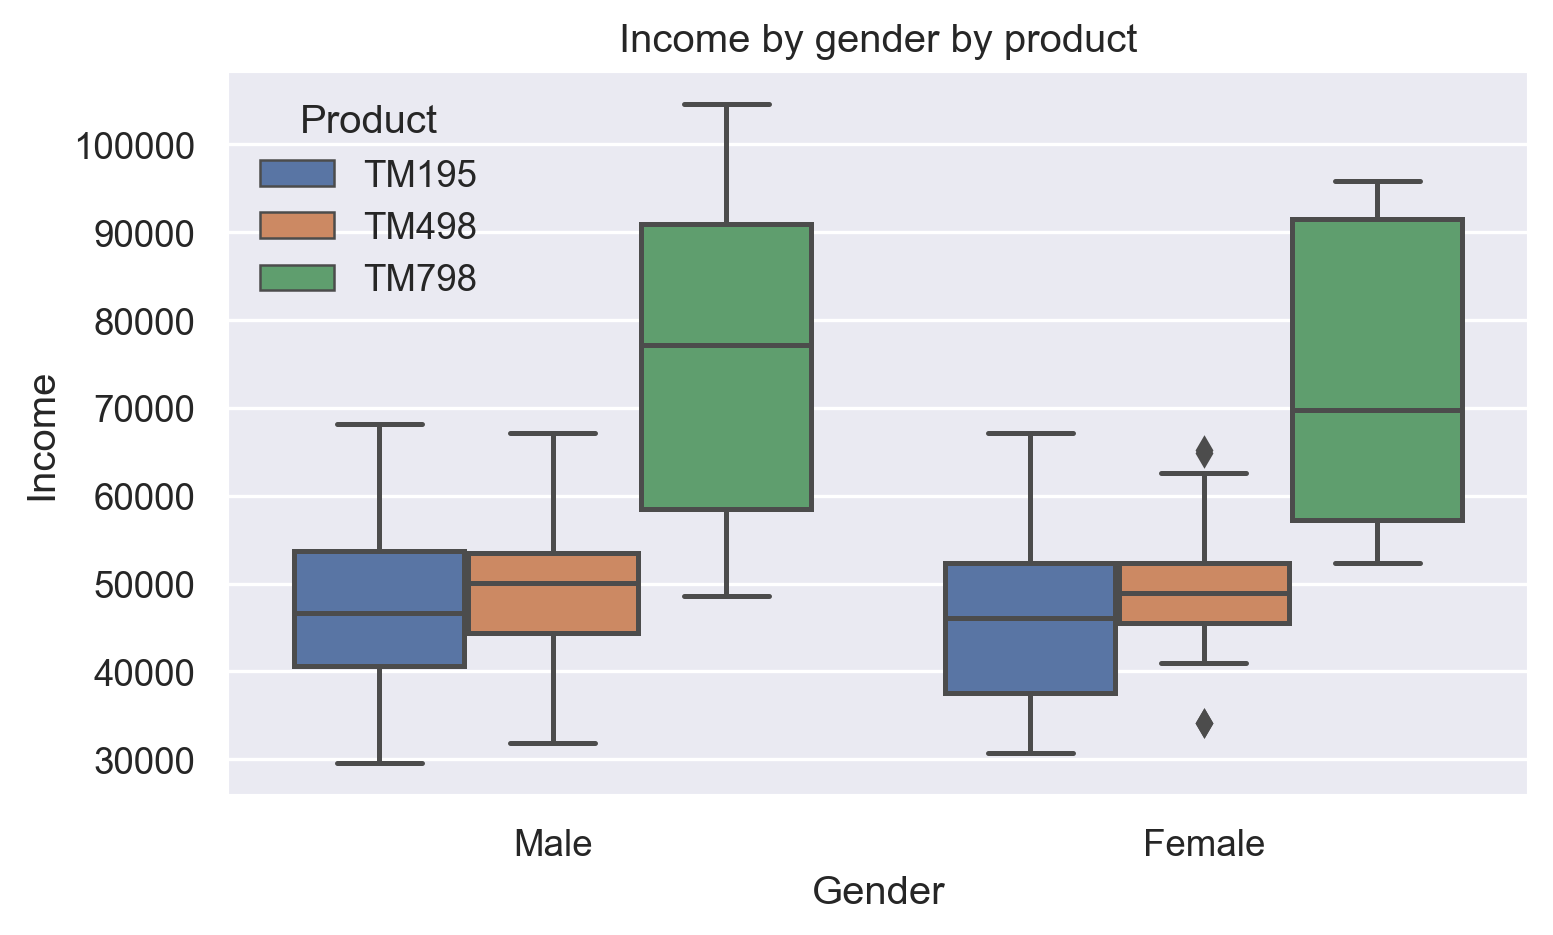

In [32]:
# Income by gender by product
sns.boxplot(x='Gender', y='Income', hue='Product', data=data).set(title='Income by gender by product');

##### <span style="color:blue"> Comment: </span>

Customers that are partnered have higher income power.

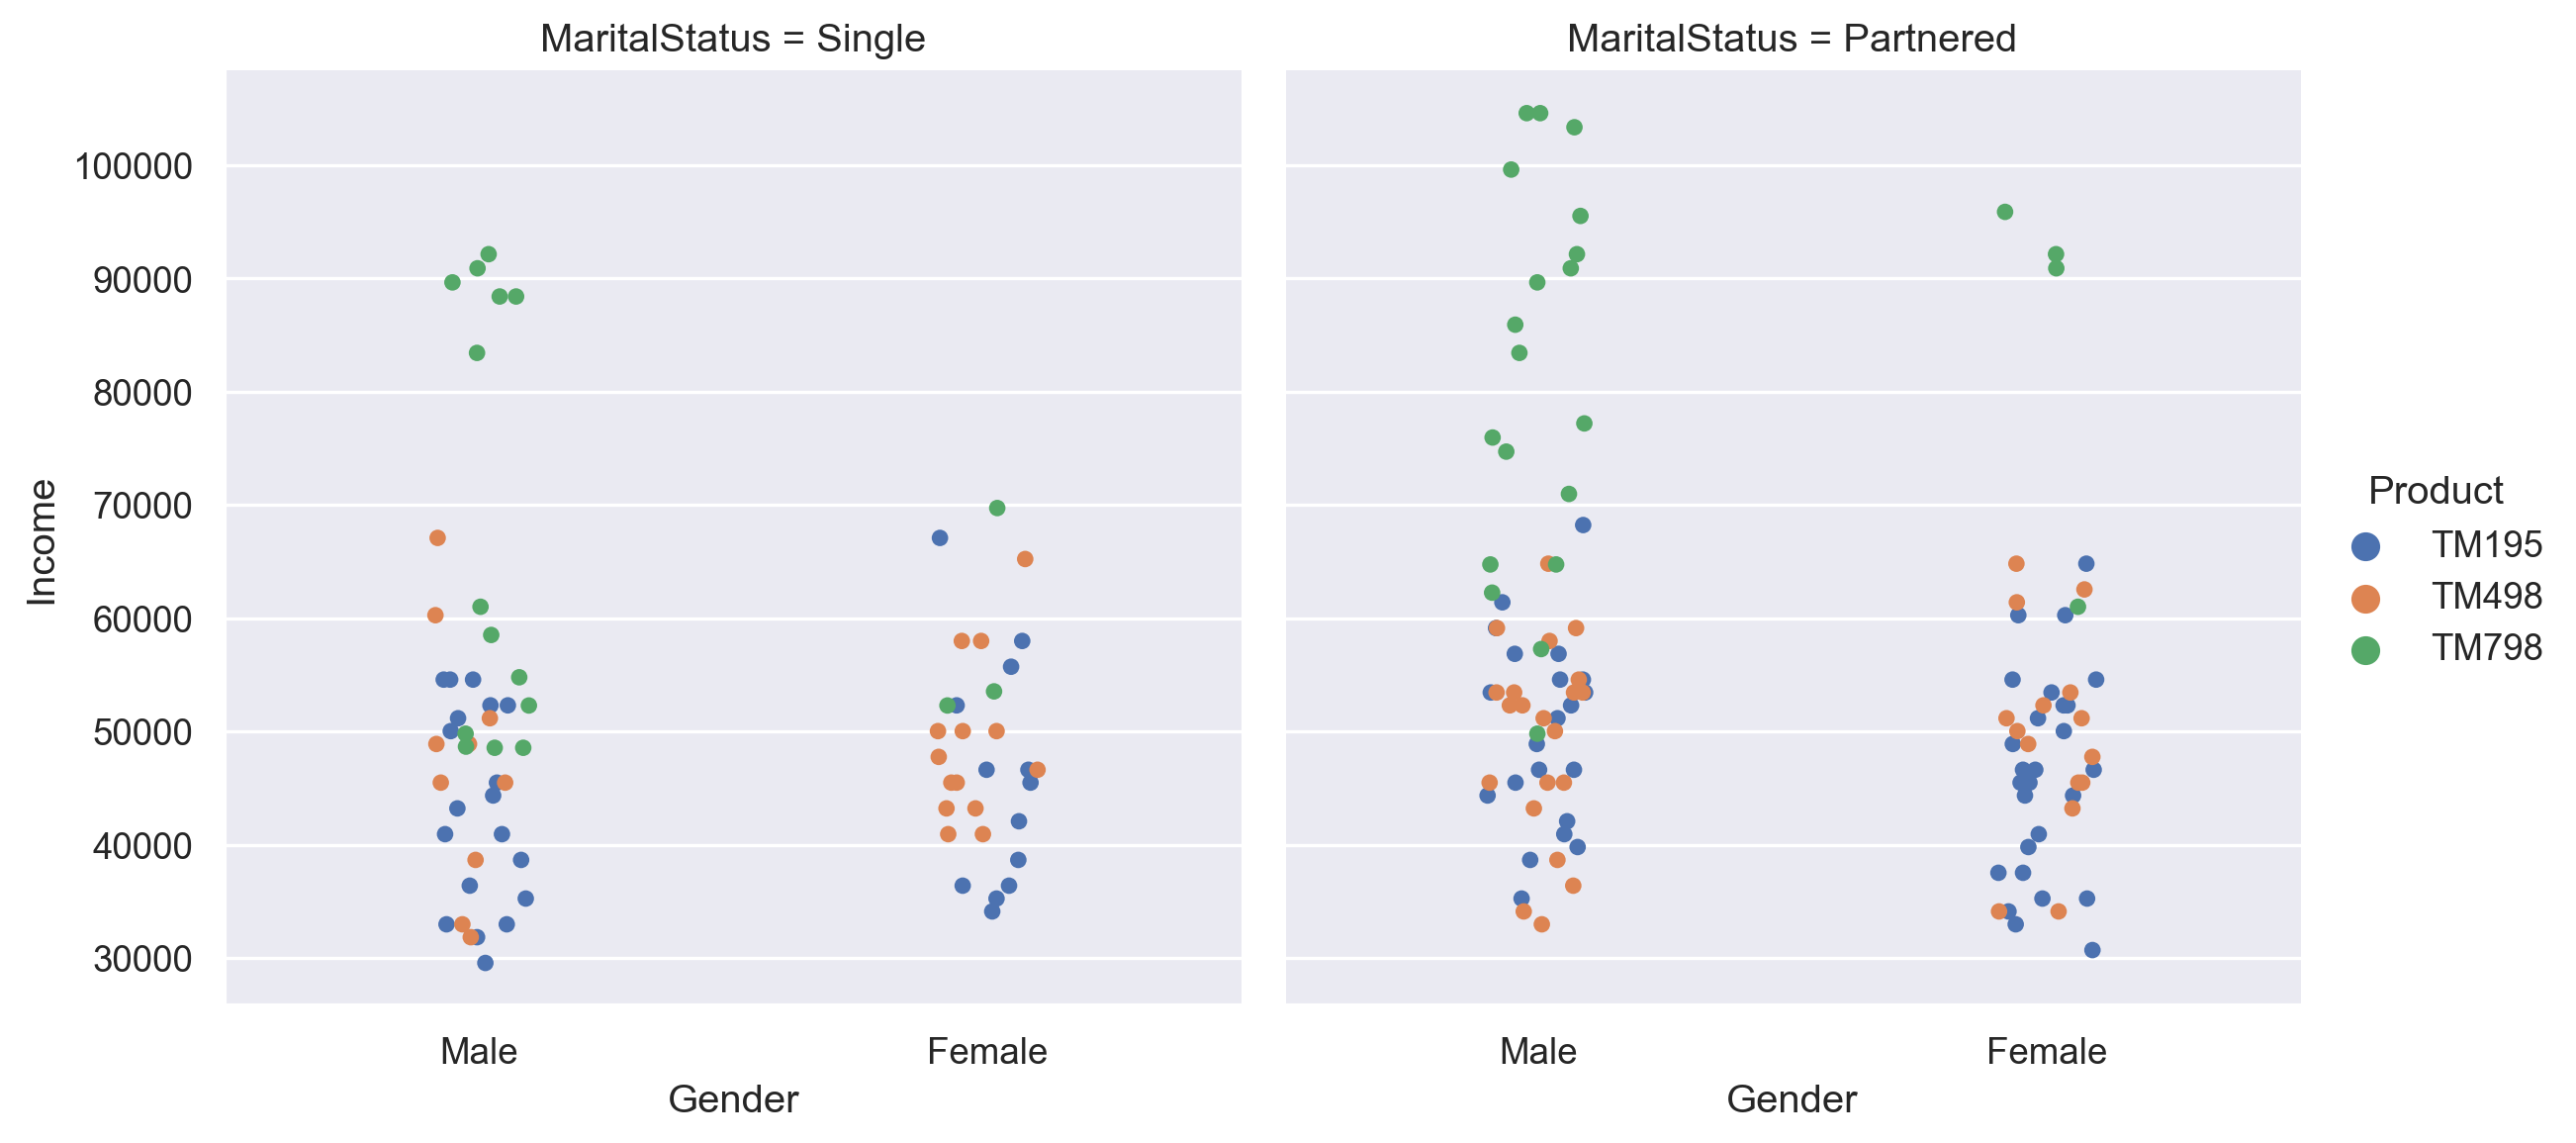

In [33]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=data);

##### <span style="color:blue"> Comment: </span>

 - Products TM195 and TM498 are bought by people with lower than $70K as income, single or partnered.
 - We also see that the majority of people who buys the TM798 are man, partnered.
 - The majority of our buyers are man.

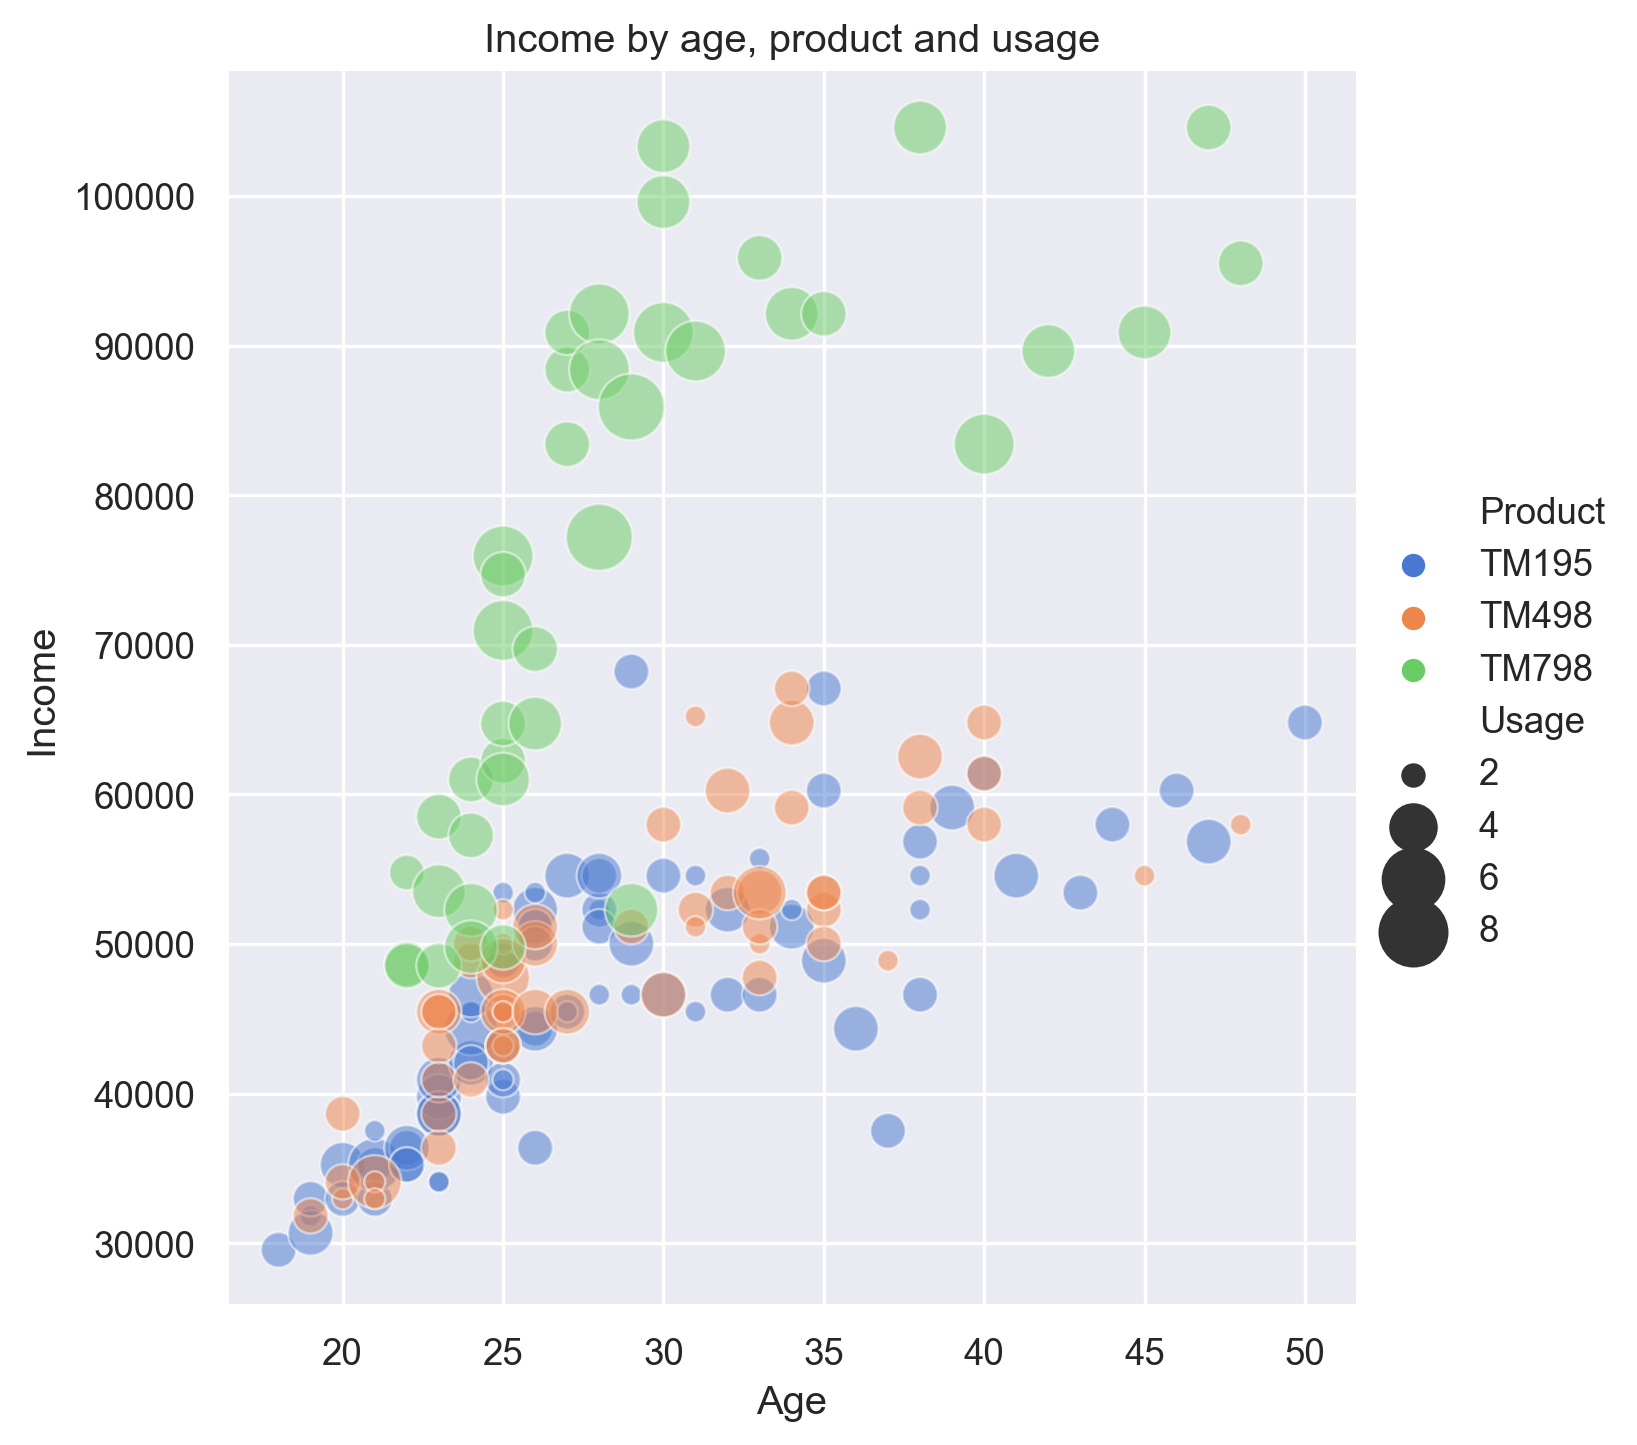

In [34]:
# Here we have a plot that takes into account income, by age, by product and the expected usage  of the product
ax2 = sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data).set(title='Income by age, product and usage');

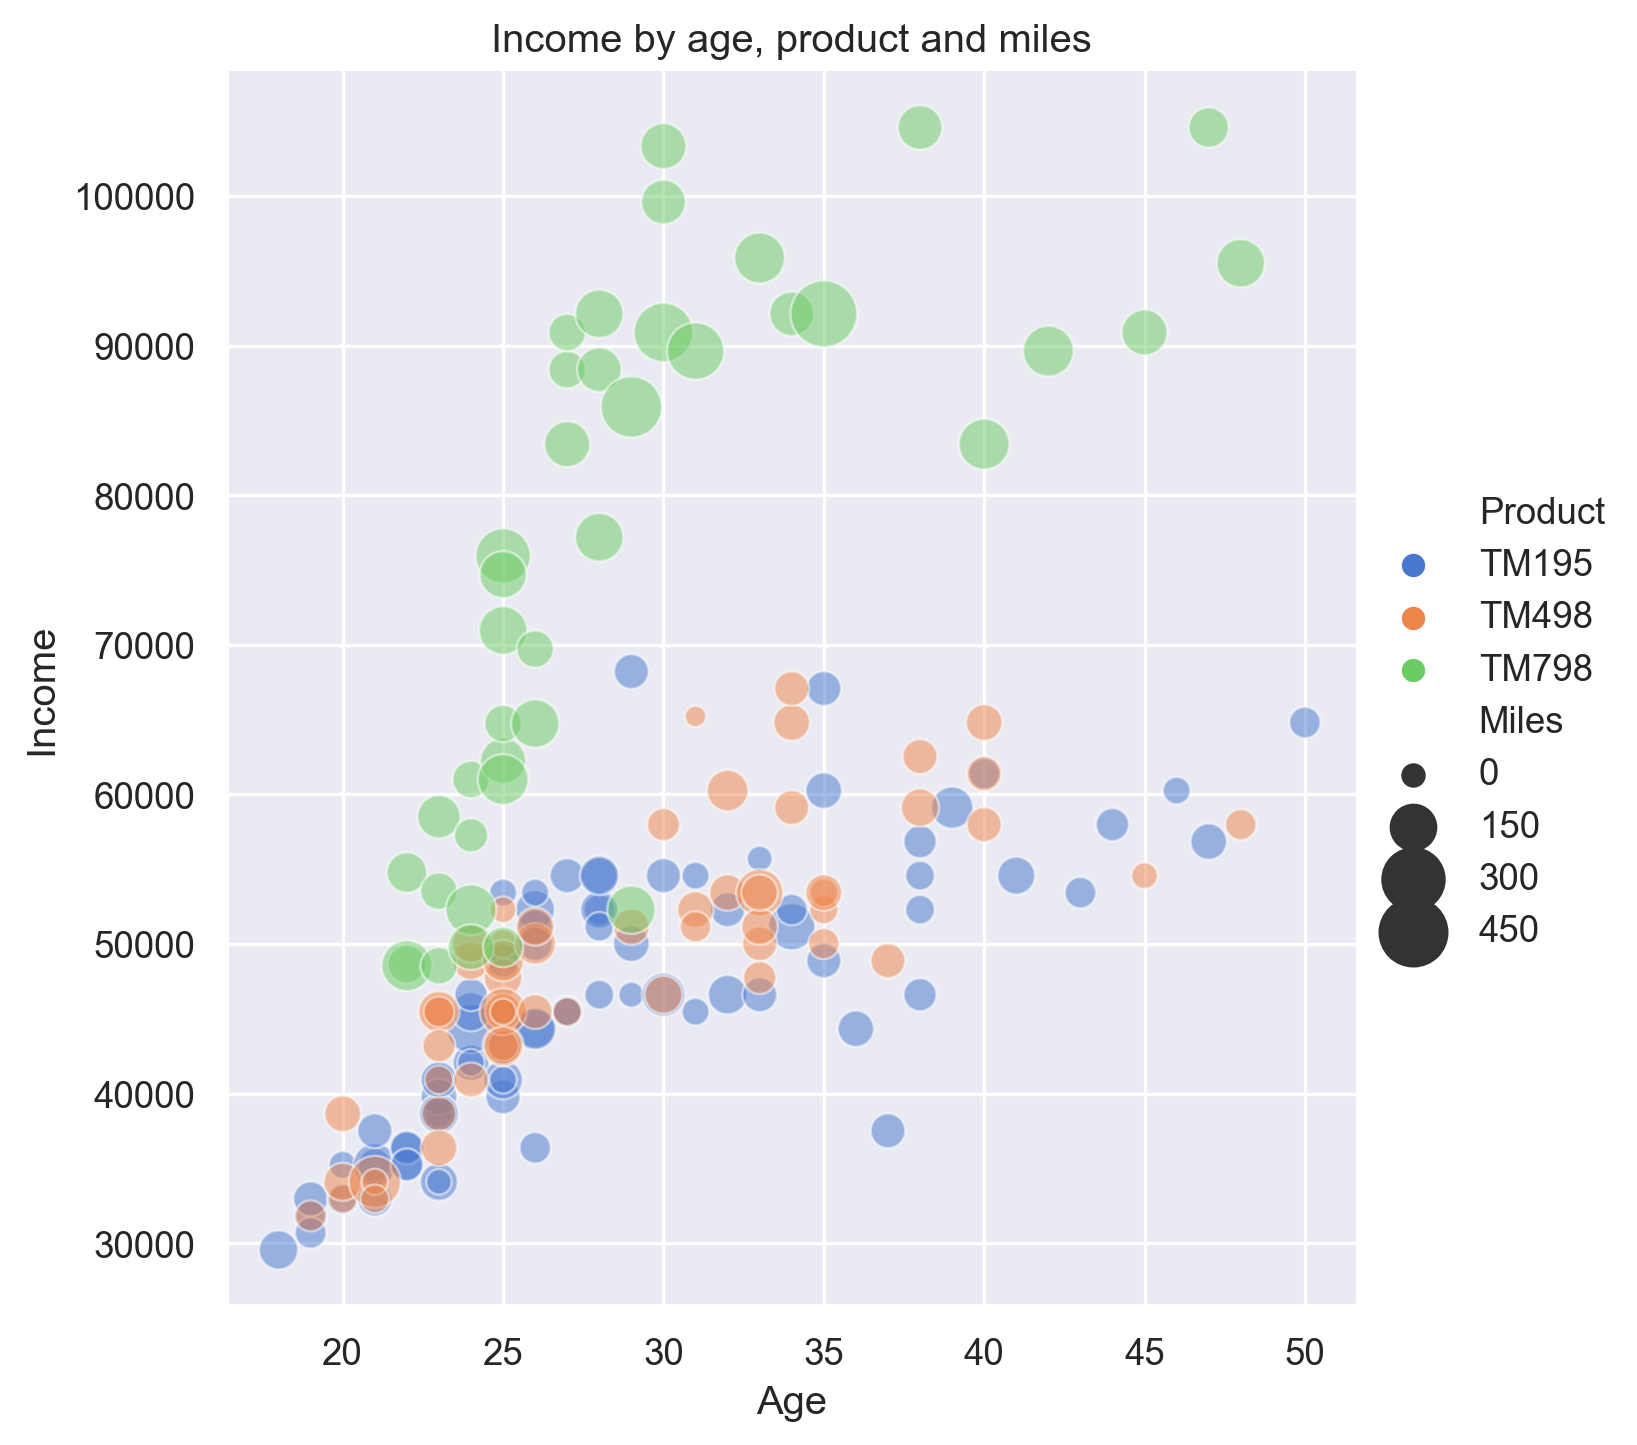

In [35]:
# Here we have a plot that takes into account income, by age, by product and the expected miles our clients think they will run.
sns.relplot(x="Age", y="Income", hue="Product", size="Miles",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data).set(title='Income by age, product and miles');

##### <span style="color:blue"> Comment: </span>

 - Products TM195 and TM498 are bought by people with lower than 70K as income.
 - Product TM798 is mainly bought by people with higher than 70K income.
 - We also see that the majority of people who buys the TM798 think they will be able to run more than consumers of the other two products, on average.

## <span style="color:blue"> Insights and recommendations.</span>


We should focus on clients we already understand, a customer profile that our data give us an edge over the competition. Those clients already buy our product and we already understand their behavior. It will allow us to increase a solid base of customers. However, I understand the possibility of building a new market share using the weakness in our ability to achieve a specific type of customer, by building a marketing campaign directed to them.<br/><br/> 

From our data, we have found that men self-rated themselves higher in fitness score than women, men believe themselves will run more miles, on average, than women believe themselves running, men believe themselves will use the product more times than women believe themselves using it, and men have a higher income, on average, than women in our dataset. Also, customers that are partnered have a higher income level. The main range of age who buy our products have between 35 and 20 years old, if we decide to approach a new market-share we should do field research on men and women older than 40 years old.<br/><br/> 

The income of our customers is positively skewed with a higher concentration of under $60,000.00. We know the clients who have a higher income level usually buy TM798 products. We might be able to divide our basket of products into two types. Class A and Classes B/C. The TM798 product is mainly bought by customers that are Class A, partnered, and male. It could be positioned as a prime product. We might be able to increase the price of the product which would bring a higher margin since the customer who buys that product has higher income level. <br/><br/> 

Customers from Class A have more confidence that they will be able to run more on average. Using that information, we can make a case about a great marketing campaign where we sell TM798 for a more athletic type of people. In this case, males partnered with a higher income level and a higher level of confidence in their physical capabilities, a customer that is expecting to use the product more frequently. The TM798 product would be our prime product, with a higher margin and a higher level of branding on it.<br/><br/> 

The other two products could be sold more like standard product towards massification for men and women, customers with lower income level, less than 70K usually buy those two products, they are expecting to use less the product on average, and they believe their physical capability is average.<br/><br/>  

All that we find so far in our data allows us to think of creating marketing towards pushing limits to both, male and female, together as a couple since partnered people have a higher income. Since male have a higher income and higher confidence in their physical capability we might have a possibility of creating marketing campaign towards men to buy the TM798 for a higher price, probably, they will be more willing to spend some amount of money on our products and would be the one who takes the decision to buy it and they would invite their wives to do exercise with them.<br/><br/>  

To the other two products the TM195 and TM498 our approach should be less specific and broader since both men and women with lower income level buys it. We would apply a standard merchandizing approach focusing on low price instead of branding and quality as we should do with TM798.<br/> 